## World Development Indicators - Analytics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

datos = pd.read_csv("suramerica.csv").drop('Unnamed: 0', 1)
datos.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Antigua and Barbuda,ATG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,126.144000
1,Antigua and Barbuda,ATG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,88.237117
2,Antigua and Barbuda,ATG,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,7.779958
3,Antigua and Barbuda,ATG,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,80.457159
4,Antigua and Barbuda,ATG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,32.920000


In [2]:
paises = ['Antigua and Barbuda','Argentina','Aruba','Bahamas, The','Barbados','Belize','Bolivia','Brazil','Cayman Islands','Chile','Colombia','Costa Rica','Cuba','Curacao','Dominica','Dominican Republic','Ecuador','El Salvador','Grenada','Guatemala','Guyana','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Paraguay','Peru','Puerto Rico','Sint Maarten (Dutch part)','St. Kitts and Nevis','St. Lucia','St. Martin (French part)','St. Vincent and the Grenadines','Suriname','Trinidad and Tobago','Turks and Caicos Islands','Uruguay','Venezuela, RB','Virgin Islands (U.S.)']
years = range(2008,2012+1)
gdp = ['NY.GDP.MKTP.KN','NY.GDP.MKTP.CN','NY.GDP.MKTP.CD','NY.GDP.MKTP.KD','NY.GDP.DEFL.ZS','NY.GDP.MKTP.KD.ZG','NY.GDP.PCAP.KD','NY.GDP.PCAP.KN','NY.GDP.PCAP.CN','NY.GDP.PCAP.CD','NY.GDP.PCAP.KD.ZG','NY.GDP.PCAP.PP.KD','NY.GDP.PCAP.PP.CD','NY.GDP.MKTP.PP.KD','NY.GDP.MKTP.PP.CD']
gross = ['NE.GDI.TOTL.ZS','NE.GDI.TOTL.KD.ZG','NE.GDI.TOTL.KD','NE.GDI.TOTL.KN','NE.GDI.TOTL.CN','NE.GDI.TOTL.CD','NY.GDY.TOTL.KN','NY.GDS.TOTL.ZS','NY.GDS.TOTL.CN','NY.GDS.TOTL.CD','NE.GDI.FTOT.ZS','NE.GDI.FTOT.KD.ZG','NE.GDI.FTOT.KD','NE.GDI.FTOT.KN','NE.GDI.FTOT.CN','NE.GDI.FTOT.CD','NE.GDI.FPRV.ZS','NE.GDI.FPRV.CN','NE.DAB.TOTL.ZS','NE.DAB.TOTL.KD','NE.DAB.TOTL.KN','NE.DAB.TOTL.CN','NE.DAB.TOTL.CD','NE.DAB.DEFL.ZS','NY.GNS.ICTR.ZS','NY.GNS.ICTR.GN.ZS','NY.GNS.ICTR.CN','NY.GNS.ICTR.CD','NY.GDP.FCST.KD','NY.GDP.FCST.KN','NY.GDP.FCST.CN','NY.GDP.FCST.CD']
gni = ['NY.GNP.MKTP.KD','NY.GNP.MKTP.KN','NY.GNP.MKTP.CN','NY.GNP.MKTP.CD','NY.GNP.MKTP.KD.ZG','NY.GNP.PCAP.KD','NY.GNP.PCAP.KN','NY.GNP.PCAP.CN','NY.GNP.PCAP.KD.ZG','NY.GNP.PCAP.CD','NY.GNP.PCAP.PP.KD','NY.GNP.PCAP.PP.CD','NY.GNP.ATLS.CD','NY.GNP.MKTP.PP.KD','NY.GNP.MKTP.PP.CD']
conjunto_nombre = ['GDP','Gross','GNI']
conjunto = [gdp,gross,gni]

In [18]:
agricultura = ['EG.ELC.ACCS.RU.ZS','EG.NSF.ACCS.RU.ZS','AG.LND.IRIG.AG.ZS','AG.LND.AGRI.ZS','AG.LND.AGRI.K2','AG.AGR.TRAC.NO','AG.LND.TRAC.ZS','EN.ATM.METH.AG.ZS','EN.ATM.METH.AG.KT.CE','EN.ATM.NOXE.AG.ZS','EN.ATM.NOXE.AG.KT.CE','TX.VAL.AGRI.ZS.UN','TM.VAL.AGRI.ZS.UN','EA.PRD.AGRI.KD','NV.AGR.TOTL.ZS','NV.AGR.TOTL.CD','ER.H2O.FWAG.ZS','AG.LND.ARBL.ZS','AG.LND.ARBL.HA.PC','AG.LND.ARBL.HA','AG.LND.PRCP.MM','AG.PRD.CREL.MT','AG.YLD.CREL.KG','AG.PRD.CROP.XD','SL.AGR.EMPL.ZS','SL.AGR.EMPL.FE.ZS','SL.AGR.EMPL.MA.ZS','AG.CON.FERT.PT.ZS','AG.CON.FERT.ZS','AG.PRD.FOOD.XD','AG.LND.FRST.ZS','AG.LND.FRST.K2','SH.STA.ACSN.RU','SH.H2O.SAFE.RU.ZS','AG.LND.TOTL.K2','AG.LND.CREL.HA','AG.PRD.LVSK.XD','AG.LND.CROP.ZS','AG.LND.TOTL.RU.K2','AG.LND.EL5M.RU.ZS','AG.LND.EL5M.RU.K2','SP.RUR.TOTL','SP.RUR.TOTL.ZS','SP.RUR.TOTL.ZG','EN.POP.EL5M.RU.ZS','SI.POV.RUGP','SI.POV.RUHC','AG.SRF.TOTL.K2']
economia = ['PA.NUS.PPP.05','PA.NUS.PRVT.PP.05','NY.ADJ.NNTY.KD.ZG','NY.ADJ.NNTY.KD','NY.ADJ.NNTY.CD','NY.ADJ.NNTY.PC.KD.ZG','NY.ADJ.NNTY.PC.KD','NY.ADJ.NNTY.PC.CD','NY.ADJ.SVNX.GN.ZS','NY.ADJ.SVNX.CD','NY.ADJ.SVNG.GN.ZS','NY.ADJ.SVNG.CD','NY.ADJ.DCO2.GN.ZS','NY.ADJ.DCO2.CD','NY.ADJ.DKAP.GN.ZS','NY.ADJ.DKAP.CD','NY.ADJ.AEDU.GN.ZS','NY.ADJ.AEDU.CD','NY.ADJ.DNGY.GN.ZS','NY.ADJ.DNGY.CD','NY.ADJ.ICTR.GN.ZS','NY.ADJ.DMIN.GN.ZS','NY.ADJ.DMIN.CD','NY.ADJ.DRES.GN.ZS','NY.ADJ.DFOR.GN.ZS','NY.ADJ.DFOR.CD','NY.ADJ.NNAT.GN.ZS','NY.ADJ.NNAT.CD','NY.ADJ.DPEM.GN.ZS','NY.ADJ.DPEM.CD','NV.AGR.TOTL.ZS','NV.AGR.TOTL.KD.ZG','NV.AGR.TOTL.KD','NV.AGR.TOTL.KN','NV.AGR.TOTL.CN','NV.AGR.TOTL.CD','GC.DOD.TOTL.GD.ZS','NE.GDI.STKB.KN','NE.GDI.STKB.CN','NE.GDI.STKB.CD','BM.GSR.ROYL.CD','BX.GSR.ROYL.CD','NV.MNF.CHEM.ZS.UN','BX.GSR.CMCP.ZS','BM.GSR.CMCP.ZS','BN.CAB.XOKA.GD.ZS','BN.CAB.XOKA.CD','PA.NUS.ATLS','NY.GDP.DISC.KN','NY.GDP.DISC.CN','GC.XPN.TOTL.GD.ZS','NY.EXP.CAPM.KN','NE.EXP.GNFS.ZS','BX.GSR.GNFS.CD','NE.EXP.GNFS.KD.ZG','NE.EXP.GNFS.KD','NE.EXP.GNFS.KN','NE.EXP.GNFS.CN','NE.EXP.GNFS.CD','BX.GSR.TOTL.CD','NE.RSB.GNFS.ZS','NE.RSB.GNFS.KN','NE.RSB.GNFS.CN','NE.RSB.GNFS.CD','DT.DOD.DECT.GN.ZS','DT.DOD.DECT.EX.ZS','DT.DOD.DECT.CD','NE.CON.TOTL.KD','NE.CON.TOTL.KN','NE.CON.TOTL.CN','NE.CON.TOTL.CD','NE.CON.TETC.ZS','NE.CON.TETC.KD.ZG','NE.CON.TETC.KD','NE.CON.TETC.KN','NE.CON.TETC.CN','NE.CON.TETC.CD','NV.MNF.FBTO.ZS.UN','BN.KLT.DINV.CD','BX.KLT.DINV.WD.GD.ZS','BX.KLT.DINV.CD.WD','BM.KLT.DINV.WD.GD.ZS','BM.KLT.DINV.CD.WD','NY.GDP.MKTP.KN','NY.GDP.MKTP.CN','NY.GDP.MKTP.CD','NY.GDP.MKTP.KD','NY.GDP.DEFL.ZS','NY.GDP.MKTP.KD.ZG','NY.GDP.PCAP.KD','NY.GDP.PCAP.KN','NY.GDP.PCAP.CN','NY.GDP.PCAP.CD','NY.GDP.PCAP.KD.ZG','NY.GDP.PCAP.PP.KD','NY.GDP.PCAP.PP.CD','NY.GDP.MKTP.PP.KD','NY.GDP.MKTP.PP.CD','NY.GNP.MKTP.KD','NY.GNP.MKTP.KN','NY.GNP.MKTP.CN','NY.GNP.MKTP.CD','NY.GNP.MKTP.KD.ZG','NY.GNP.PCAP.KD','NY.GNP.PCAP.KN','NY.GNP.PCAP.CN','NY.GNP.PCAP.KD.ZG','NY.GNP.PCAP.CD','NY.GNP.PCAP.PP.KD','NY.GNP.PCAP.PP.CD','NY.GNP.ATLS.CD','NY.GNP.MKTP.PP.KD','NY.GNP.MKTP.PP.CD','NE.CON.GOVT.ZS','NE.CON.GOVT.KD.ZG','NE.CON.GOVT.KD','NE.CON.GOVT.KN','NE.CON.GOVT.CN','NE.CON.GOVT.CD','BX.GSR.MRCH.CD','BM.GSR.MRCH.CD','BX.GRT.EXTA.CD.WD','NE.GDI.TOTL.ZS','NE.GDI.TOTL.KD.ZG','NE.GDI.TOTL.KD','NE.GDI.TOTL.KN','NE.GDI.TOTL.CN','NE.GDI.TOTL.CD','NY.GDY.TOTL.KN','NY.GDS.TOTL.ZS','NY.GDS.TOTL.CN','NY.GDS.TOTL.CD','NE.GDI.FTOT.ZS','NE.GDI.FTOT.KD.ZG','NE.GDI.FTOT.KD','NE.GDI.FTOT.KN','NE.GDI.FTOT.CN','NE.GDI.FTOT.CD','NE.GDI.FPRV.ZS','NE.GDI.FPRV.CN','NE.DAB.TOTL.ZS','NE.DAB.TOTL.KD','NE.DAB.TOTL.KN','NE.DAB.TOTL.CN','NE.DAB.TOTL.CD','NE.DAB.DEFL.ZS','NY.GNS.ICTR.ZS','NY.GNS.ICTR.GN.ZS','NY.GNS.ICTR.CN','NY.GNS.ICTR.CD','NY.GDP.FCST.KD','NY.GDP.FCST.KN','NY.GDP.FCST.CN','NY.GDP.FCST.CD','NE.CON.PRVT.KD.ZG','NE.CON.PRVT.KD','NE.CON.PRVT.KN','NE.CON.PRVT.CN','NE.CON.PRVT.CD','NE.CON.PRVT.PC.KD','NE.CON.PRVT.PC.KD.ZG','NE.CON.PRVT.PP.KD','NE.CON.PRVT.PP.CD','NE.CON.PETC.ZS','NE.CON.PETC.KD.ZG','NE.CON.PETC.KD','NE.CON.PETC.KN','NE.CON.PETC.CN','NE.CON.PETC.CD','BX.GSR.CCIS.ZS','BX.GSR.CCIS.CD','NE.IMP.GNFS.ZS','BM.GSR.GNFS.CD','NE.IMP.GNFS.KD.ZG','NE.IMP.GNFS.KD','NE.IMP.GNFS.KN','NE.IMP.GNFS.CN','NE.IMP.GNFS.CD','BM.GSR.TOTL.CD','NV.IND.TOTL.ZS','NV.IND.TOTL.KD.ZG','NV.IND.TOTL.KD','NV.IND.TOTL.KN','NV.IND.TOTL.CN','NV.IND.TOTL.CD','NY.GDP.DEFL.KD.ZG','FP.CPI.TOTL.ZG','BX.GSR.INSF.ZS','BM.GSR.INSF.ZS','DT.INT.DECT.GN.ZS','DT.INT.DECT.EX.ZS','NV.MNF.MTRN.ZS.UN','NV.IND.MANF.ZS','NV.IND.MANF.KD.ZG','NV.IND.MANF.KD','NV.IND.MANF.KN','NV.IND.MANF.CN','NV.IND.MANF.CD','DT.ODA.ODAT.GN.ZS','DT.ODA.ODAT.PC.ZS','BN.TRF.KOGT.CD','NY.TRF.NCTR.KN','NY.TRF.NCTR.CN','NY.TRF.NCTR.CD','BN.KAC.EOMS.CD','BN.FIN.TOTL.CD','NY.GSR.NFCY.KN','NY.GSR.NFCY.CN','NY.GSR.NFCY.CD','DT.ODA.ODAT.CD','BN.GSR.FCTY.CD','BN.TRF.CURR.CD','NY.TAX.NIND.KN','NY.TAX.NIND.CN','NY.TAX.NIND.CD','BN.GSR.MRCH.CD','BN.GSR.GNFS.CD','NV.MNF.OTHR.ZS.UN','PA.NUS.PPP','PA.NUS.PRVT.PP','BM.TRF.PWKR.CD.DT','BX.TRF.PWKR.DT.GD.ZS','BX.TRF.PWKR.CD.DT','BX.TRF.PWKR.CD','BN.KLT.PTXL.CD','BX.PEF.TOTL.CD.WD','DT.DOD.PVLX.GN.ZS','DT.DOD.PVLX.EX.ZS','DT.DOD.PVLX.CD','PA.NUS.PPPC.RF','BX.KLT.DREM.CD.DT','BM.GSR.FCTY.CD','BX.GSR.FCTY.CD','BN.RES.INCL.CD','GC.REV.XGRT.GD.ZS','BX.TRF.CURR.CD','BM.TRF.PRVT.CD','BX.GSR.NFSV.CD','BM.GSR.NFSV.CD','NV.SRV.TETC.ZS','NV.SRV.TETC.KD.ZG','NV.SRV.TETC.KD','NV.SRV.TETC.KN','NV.SRV.TETC.CN','NV.SRV.TETC.CD','DT.DOD.DSTC.XP.ZS','DT.DOD.DSTC.IR.ZS','BX.GRT.TECH.CD.WD','NY.TTF.GNFS.KN','NV.MNF.TXTL.ZS.UN','DT.TDS.DECT.GN.ZS','DT.TDS.DECT.EX.ZS','FI.RES.TOTL.CD','FI.RES.XGLD.CD','NE.TRD.GNFS.ZS','BG.GSR.NFSV.GD.ZS','BX.GSR.TRAN.ZS','BM.GSR.TRAN.ZS','BX.GSR.TRVL.ZS','BM.GSR.TRVL.ZS']

In [3]:
def r2(y_true, y_predict):
    from sklearn.metrics import r2_score
    return r2_score(y_true, y_predict)

In [4]:
def imputador(tab):
    from sklearn.preprocessing import Imputer
    impute=Imputer(missing_values="NaN",strategy='mean',axis=0)
    impute.fit(tab)
    tab_imputada=impute.transform(tab)
    return pd.DataFrame(tab_imputada)

In [5]:
def zeros(tab):
    #Asignamos a los NaN el valor de 0
    tab_zeros = pd.DataFrame(tab).fillna(value=0)
    #Eliminamos las columnas de Zeros descartando Indicadores que no tienen regristros para ningún pais y año deseados
    tab_zeros_2 = tab_zeros.loc[:, (tab_zeros != 0).any(axis=0)]
    return tab_zeros_2

In [6]:
def Grid_Search_CV(X_train, y_train):
    from sklearn.grid_search import GridSearchCV
    from sklearn.cross_validation import ShuffleSplit
    from sklearn.metrics import make_scorer
    from sklearn.tree import DecisionTreeRegressor
    
    cv = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size=0.2, random_state=0)
    estimator = DecisionTreeRegressor()
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'splitter': ['best', 'random']}

    grid = GridSearchCV(estimator, params, cv=cv, scoring="r2")

    grid.fit(X_train, y_train)
    
    for k,v in grid.best_params_.iteritems():
        best_max_depth = v
    
    return best_max_depth

In [7]:
def DTR_v2(X_train, X_test, y_train, y_test, depth):
    from sklearn.tree import DecisionTreeRegressor
    estimator = DecisionTreeRegressor(max_depth=depth)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    return r2(y_test,y_predict)

In [8]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    plt.title('Matriz de correlacion')
    fig.colorbar(cax)
    plt.show()

In [9]:
def correlacion(tab,y_indicator):
    # Buscamos los indicadores que se correlacionen más (coeficiente > 0.7)
    eliminar = []
    tabla_correlacion = np.array(pd.DataFrame(tab).corr())
    for i in range(np.shape(tab)[1]):
        if abs(tabla_correlacion[i,y_indicator]) > 0.7:
            eliminar.append(i)

    # Eliminamos los indicadores que se correlacionan más (Coeficiente > 0.7)
    temporal = tab[:,:]

    for i in range(len(eliminar)):
        temporal = np.delete(temporal[:,:], eliminar[i]-i, 1)

    return temporal

In [10]:
def splitter_v3(tabla_1,tabla_2,y_indicator):
    from sklearn.model_selection import train_test_split
    #Fusionamos la tabla_1 y el indicador y de la tabla_2
    tab_fusion = np.column_stack((tabla_1[:,:],tabla_2[:,y_indicator]))
    
    # Asignamos X e y, eliminando los indicadores que se correlacionen más (coeficiente > 0.7)  
    X = correlacion(tab_fusion,-1)
    y = tab_fusion[:,-1]
    
    # Separamos Train y Test respectivamente para X e y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    return X_train, X_test, y_train, y_test

In [11]:
def iter_R2_Splitter_v3(tab1,tab2):    
    R2_global = list()
    for i in range(0,np.shape(tab2)[1]):
        ## Zeros
        X_train, X_test, y_train, y_test = splitter_v3(np.array(zeros(tab1)),np.array(zeros(tab2)),i)
        best_max_depth = Grid_Search_CV(X_train, y_train)
        R2_Original_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)

        ## Imputado
        X_train, X_test, y_train, y_test = splitter_v3(np.array(imputador(tab1)),np.array(imputador(tab2)),i)
        best_max_depth = Grid_Search_CV(X_train, y_train)
        R2_Imputado_GridSearchCV = DTR_v2(X_train, X_test, y_train, y_test,best_max_depth)

        # Recopilamos los R2
        R2_global.append([R2_Original_GridSearchCV,R2_Imputado_GridSearchCV])
    
    return pd.DataFrame(R2_global,columns=['Original','Imputado'])

In [12]:
def porcentaje(valor):
    x=0.0
    for i in np.array(valor):
        if (i[0] > 0.9 and i[1] > 0.9):
            x=x+1
    return x/len(valor)

In [13]:
def tabla_base(paises,years,indicadores,datos):
    tab = pd.DataFrame.pivot_table(datos, values='Value', index=['CountryName', 'Year'], columns=['IndicatorCode']).loc[(paises,years),indicadores].sortlevel(["CountryName","Year"], ascending=[True,False])
    return tab

In [14]:
def tabla_2_base(datos,indicadores,look_back):
    temp_table = []
    for k in range(look_back):
        temp_years = []
        for i in range(len(years)): 
            temp_years.append(years[i]-k)
        temp_table.append(pd.DataFrame.pivot_table(datos, values='Value', index=['CountryName', 'Year'], columns=['IndicatorCode']).loc[(paises,temp_years),indicadores].sortlevel(["CountryName","Year"], ascending=[True,False]))
    return pd.DataFrame(np.column_stack(temp_table))

In [15]:
def iterador_global(datos,paises,years,indicadores_1,indicadores_2):
    
    t_1 = tabla_base(paises,years,indicadores_1,datos)
    t_2 = tabla_base(paises,years,indicadores_2,datos)
    
    iterador = iter_R2_Splitter_v3(t_1,t_2)
    
    return iterador

In [16]:
tabla_base(paises,years,gdp[:5],datos).head()

IndicatorCode             NY.GDP.MKTP.KN  NY.GDP.MKTP.CN  NY.GDP.MKTP.CD  \
CountryName         Year                                                   
Antigua and Barbuda 2012    2.802259e+09    3.252725e+09    1.204713e+09   
                    2011    2.693974e+09    3.050780e+09    1.129918e+09   
                    2010    2.743171e+09    3.065955e+09    1.135539e+09   
                    2009    2.954188e+09    3.257308e+09    1.206410e+09   
                    2008    3.358406e+09    3.637845e+09    1.347350e+09   

IndicatorCode             NY.GDP.MKTP.KD  NY.GDP.DEFL.ZS  
CountryName         Year                                  
Antigua and Barbuda 2012    1.033890e+09      116.075112  
                    2011    9.939385e+08      113.244595  
                    2010    1.012090e+09      111.766847  
                    2009    1.089944e+09      110.260684  
                    2008    1.239080e+09      108.320559

,Original,Imputado
0,0.699598,0.491615
1,-0.890953,0.082870
2,0.955514,0.719432
3,0.997867,0.418609
4,0.995039,0.991857
5,0.439023,-4.743835
6,0.995344,0.993139
7,0.553435,0.754601
8,0.948265,-6.118318
9,0.766183,0.744041


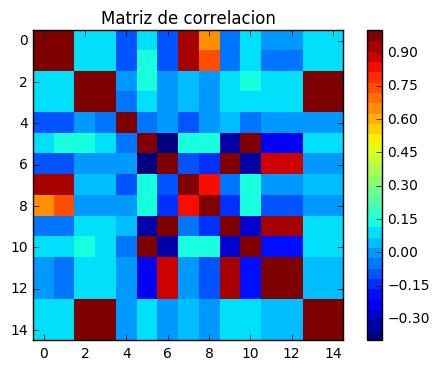

In [24]:
correlation_matrix(tabla_2_base(datos,gdp,1))

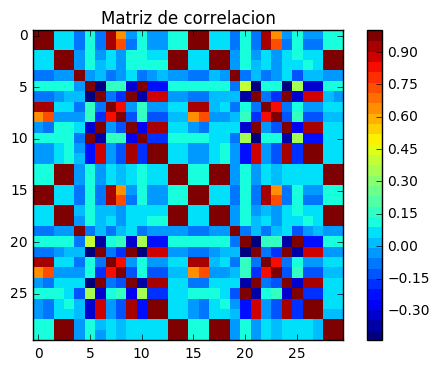

In [25]:
correlation_matrix(tabla_2_base(datos,gdp,2))

In [23]:
for k in range(2):
    temp_years = []
    for i in range(len(years)): 
        temp_years.append(years[i]-k)
temp_years

[2008, 2009, 2010, 2011, 2012]
[2007, 2008, 2009, 2010, 2011]
[2006, 2007, 2008, 2009, 2010]


[2006, 2007, 2008, 2009, 2010]

In [17]:
t1 = pd.DataFrame.pivot_table(datos, values='Value', index=['CountryName', 'Year'], columns=['IndicatorCode']).loc[(paises,years),gdp[:3]].sortlevel(["CountryName","Year"], ascending=[True,False])
t1.head()

IndicatorCode             NY.GDP.MKTP.KN  NY.GDP.MKTP.CN  NY.GDP.MKTP.CD
CountryName         Year                                                
Antigua and Barbuda 2012    2.802259e+09    3.252725e+09    1.204713e+09
                    2011    2.693974e+09    3.050780e+09    1.129918e+09
                    2010    2.743171e+09    3.065955e+09    1.135539e+09
                    2009    2.954188e+09    3.257308e+09    1.206410e+09
                    2008    3.358406e+09    3.637845e+09    1.347350e+09

In [19]:
t2 = pd.DataFrame.pivot_table(datos, values='Value', index=['CountryName', 'Year'], columns=['IndicatorCode']).loc[(paises,temp_years),gdp[:3]].sortlevel(["CountryName","Year"], ascending=[True,False])
t2.head()

IndicatorCode             NY.GDP.MKTP.KN  NY.GDP.MKTP.CN  NY.GDP.MKTP.CD
CountryName         Year                                                
Antigua and Barbuda 2011    2.693974e+09    3.050780e+09    1.129918e+09
                    2010    2.743171e+09    3.065955e+09    1.135539e+09
                    2009    2.954188e+09    3.257308e+09    1.206410e+09
                    2008    3.358406e+09    3.637845e+09    1.347350e+09
                    2007    3.356020e+09    3.480987e+09    1.289254e+09

In [20]:
pd.DataFrame(np.column_stack([t1,t2])).head()

,0,1,2,3,4,5
0,2.802259e+09,3.252725e+09,1.204713e+09,2.693974e+09,3.050780e+09,1.129918e+09
1,2.693974e+09,3.050780e+09,1.129918e+09,2.743171e+09,3.065955e+09,1.135539e+09
2,2.743171e+09,3.065955e+09,1.135539e+09,2.954188e+09,3.257308e+09,1.206410e+09
3,2.954188e+09,3.257308e+09,1.206410e+09,3.358406e+09,3.637845e+09,1.347350e+09
4,3.358406e+09,3.637845e+09,1.347350e+09,3.356020e+09,3.480987e+09,1.289254e+09


In [31]:
tabla_2_base(datos,gdp,2).head()

,0,1,2,3,4,5
0,2.802259e+09,3.252725e+09,1.204713e+09,2.693974e+09,3.050780e+09,1.129918e+09
1,2.693974e+09,3.050780e+09,1.129918e+09,2.743171e+09,3.065955e+09,1.135539e+09
2,2.743171e+09,3.065955e+09,1.135539e+09,2.954188e+09,3.257308e+09,1.206410e+09
3,2.954188e+09,3.257308e+09,1.206410e+09,3.358406e+09,3.637845e+09,1.347350e+09
4,3.358406e+09,3.637845e+09,1.347350e+09,3.356020e+09,3.480987e+09,1.289254e+09


In [23]:
def tabla_2_base(datos,indicadores,look_back):
    temp_table = []
    for k in range(look_back):
        temp_years = []
        for i in range(len(years)): 
            temp_years.append(years[i]-k)
        temp_table.append(pd.DataFrame.pivot_table(datos, values='Value', index=['CountryName', 'Year'], columns=['IndicatorCode']).loc[(paises,temp_years),indicadores].sortlevel(["CountryName","Year"], ascending=[True,False]))
    return pd.DataFrame(np.column_stack(temp_table))

In [ ]:
def iterador_global_2(datos,paises,years,indicadores_1,indicadores_2,look_back):
    
    t_1 = tabla_2_base(datos,indicadores_1,look_back)
    t_2 = tabla_base(paises,years,indicadores_2,datos)
    
    iterador = iter_R2_Splitter_v3(t_1,t_2)
    
    return iterador

In [ ]:
iterador_global_2(datos,paises,years,economia[:50],agricultura[:],2)

In [17]:
start_time = time.time()

resultado = []
look_back = 2
for i in range(len(conjunto)):
    resultado.append([conjunto_nombre[0],conjunto_nombre[i],porcentaje(iterador_global_2(datos,paises,years,conjunto[0],conjunto[i],look_back))])
    
print("--- %s seconds ---" % (time.time() - start_time))
pd.DataFrame(resultado, columns=["Base","Target","% > 90%"])

--- 99.3480000496 seconds ---


,Base,Target,% > 90%
0,GDP,GDP,0.466667
1,GDP,Gross,0.500000
2,GDP,GNI,0.266667


In [18]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=['GDP', 'Gross', 'GNI'],
            y=np.array(resultado)[:,2]
    )]

py.iplot(data, filename='GDP')

In [19]:
start_time = time.time()

resultado = []
for i in range(len(conjunto)):
    for j in range(len(conjunto)):
        resultado.append([conjunto_nombre[i],conjunto_nombre[j],porcentaje(iterador_global(datos,paises,years,conjunto[i],conjunto[j]))])
        
print("--- %s seconds ---" % (time.time() - start_time))
pd.DataFrame(resultado, columns=["Base","Target","% > 90%"])

--- 301.758999825 seconds ---


,Base,Target,% > 90%
0,GDP,GDP,0.066667
1,GDP,Gross,0.187500
2,GDP,GNI,0.266667
3,Gross,GDP,0.200000
4,Gross,Gross,0.218750
5,Gross,GNI,0.266667
6,GNI,GDP,0.400000
7,GNI,Gross,0.375000
8,GNI,GNI,0.333333


In [21]:
data = [
        go.Heatmap(
            z=np.array(resultado)[:,2],
            x=np.array(resultado)[:,1],
            y=np.array(resultado)[:,0],
            colorscale='Viridis'
        )
    ]
py.iplot(data, filename='Resultado Global')